In [4]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_size,device):
    img_url = 'https://images.unsplash.com/photo-1533450718592-29d45635f0a9?auto=format&fit=crop&q=80&w=1000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8anBnfGVufDB8fDB8fHww'
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))

    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ])
    image = transform(raw_image).unsqueeze(0).to(device)
    return image

# Image Captioning
Perform image captioning using finetuned BLIP model

In [9]:
#pip install timm

In [4]:
#!pip install fairscale

     ---------------------------------------- 0.0/266.3 kB ? eta -:--:--
     ---------------- --------------------- 112.6/266.3 kB 3.3 MB/s eta 0:00:01
     -------------------------------------  266.2/266.3 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 266.3/266.3 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for fairscale: filename=fairscale-0.4.13-py3-none-any.whl size=332117 sha256=94b37bbd8d78569e292dd7d60a03d1c5798ed9c0aee55978427133dda83b26e7
  Stored in directory: c:\users\haris\appdata\local\pip\cache\wheels\95\ef\96\5044bde220b2ea2

In [5]:
#!pip install transformers

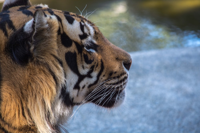

reshape position embedding from 196 to 576
load checkpoint from model_base_capfilt_large.pth
caption: a tiger's face from the side, in front of a pond and the


In [5]:
from models.blip import blip_decoder

image_size = 384
image = load_demo_image(image_size=image_size, device=device)

model_url = 'model_base_capfilt_large.pth'

model = blip_decoder(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

with torch.no_grad():
    caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5)
    print('caption: '+caption[0])